In [12]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
import tensorflow_datasets as tfds
import time
import tensorflow.keras.backend as keras_backend

Hyperparameter

In [13]:
epochs = 90
shots = 2
classes = 5
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
loss_function = tf.keras.losses.CategoricalCrossentropy()
batch_size = 256
n_way =5
k_shot =5
alpha = 0.05

In [14]:
def preprocess_image(image, label):
    # 將圖像調整為適合模型的大小，例如 32x32
    image = tf.image.resize(image, (28, 28))
    # 標準化圖像到 [0, 1]
    label = tf.cast(label, tf.int32)
    image = tf.cast(image, tf.float64) / 255.0
    return image, label

def convert_to_rgb(x, y):
    # 假設 x 是影像，y 是標籤
    x_rgb = tf.image.grayscale_to_rgb(x)
    return x_rgb, y

def show_images(dataset, num_images=5):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(1)):  # 取第一批資料
        for j in range(num_images):
            ax = plt.subplot(1, num_images, j + 1)
            plt.imshow(image[j])  # 顯示第 j 張圖片
            plt.title(f"Label: {label[j].numpy()}")
            plt.axis("off")
    plt.show()
def to64(image, label):
    label = tf.cast(label, tf.int32)
    image = tf.cast(image, tf.float64)
    return image, label

fewshot

In [15]:
train_ds , info= tfds.load("omniglot", split='train', as_supervised=True, shuffle_files=False,with_info=True)
train_data = []
test_data = []
train_labels = []
test_labels = []
data={}
tdata={}
clk = 0
def extraction(image, label):
    image = tf.image.convert_image_dtype(image, tf.float64)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image, [28, 28])
    return image, label
        
for image, label in train_ds.map(extraction):
    image = image.numpy()
    label = str(label.numpy())
    if label not in data:
        data[label] = []
    data[label].append(image)
    train_labels = list(data.keys())
ds= tfds.load("omniglot", split="test", as_supervised=True, shuffle_files=False)

for image, label in ds.map(extraction):
    image = image.numpy()
    label = str(label.numpy())
    if label not in tdata:
        tdata[label] = []
    tdata[label].append(image)
    test_labels = list(tdata.keys())
    
test_labels = set(test_labels) 
a = list(map(int,test_labels))
a.sort()
print(a)

train_labels = set(train_labels) 
b = list(map(int,train_labels))
b.sort()
print(b)
test_labels = set(test_labels) 
a = list(map(int,test_labels))
a.sort()
print(a)

train_labels = set(train_labels) 
b = list(map(int,train_labels))
b.sort()
print(b)

x_omni_train = []
x_omni_val = []
x_omni_test = []
y_omni_train = []
y_omni_val = []
y_omni_test = []

for i in range(964):
    x_omni_train.extend(data[f"{i}"][:18])
    x_omni_val.extend(data[f"{i}"][-2:])
    
for i in range(964,1623,1):
    x_omni_test.extend(tdata[f"{i}"][:20])
    
for i in range(964):
    for j in range(18):
        y_omni_train.append(i)
        
for i in range(964):
    for j in range(2):
        y_omni_val.append(i)
        
for i in range(964,1623,1):
    for j in range(20):
        y_omni_test.append(i)
x_omni_train = np.array(x_omni_train)
x_omni_val = np.array(x_omni_val)
x_omni_test = np.array(x_omni_test)
y_omni_train = np.array(y_omni_train)
y_omni_val = np.array(y_omni_val)
y_omni_test = np.array(y_omni_test)

print(len(x_omni_train))
print(len(x_omni_val))
print(len(x_omni_test))
print(len(y_omni_train))
print(len(y_omni_val))
print(len(y_omni_test))

omni_train = tf.data.Dataset.from_tensor_slices((x_omni_train, y_omni_train)).shuffle(len(x_omni_train)).batch(batch_size).map(to64)
omni_val = tf.data.Dataset.from_tensor_slices((x_omni_val, y_omni_val)).shuffle(len(x_omni_val)).batch(batch_size).map(to64)
omni_test = tf.data.Dataset.from_tensor_slices((x_omni_test, y_omni_test)).shuffle(len(x_omni_test)).batch(batch_size).map(to64)

c:\Users\TKU\anaconda3\envs\UMTRA2\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 113

定義feature extractor

In [16]:
class MyModel(tf.keras.Model):
    def __init__(self):
        
        super(MyModel, self).__init__()
        
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")
        self.bn1   = tf.keras.layers.BatchNormalization()
        self.relu1 = tf.keras.layers.ReLU()
        self.pool1 = tf.keras.layers.MaxPool2D()
        
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")
        self.bn2   = tf.keras.layers.BatchNormalization()
        self.relu2 = tf.keras.layers.ReLU()
        self.pool2 = tf.keras.layers.MaxPool2D()
        
        self.conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")
        self.bn3   = tf.keras.layers.BatchNormalization()
        self.relu3 = tf.keras.layers.ReLU()
        self.pool3 = tf.keras.layers.MaxPool2D()
        
        self.conv4 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")
        self.bn4   = tf.keras.layers.BatchNormalization()
        self.relu4 = tf.keras.layers.ReLU()
        self.pool4 = tf.keras.layers.MaxPool2D()
        
        self.flat = tf.keras.layers.Flatten()
        self.dense = tf.keras.layers.Dense(964, activation="softmax",
                          kernel_initializer="he_normal",
                          kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=tf.keras.regularizers.L2(1e-4),
                          activity_regularizer=tf.keras.regularizers.L2(1e-5))
        


    
    def call(self, input):
        x = self.conv1(input)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        
        
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        
        
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.pool4(x)

        
        x = self.flat(x)
        output = self.dense(x)
        return output

model = MyModel()

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# model.build(input_shape=(None, 28, 28, 1))
# model.summary()

In [17]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

# 前向傳播與梯度計算函數 (訓練步驟)
tf.config.run_functions_eagerly(True)
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss = loss_fn(y, logits)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    train_acc_metric.update_state(y, logits)
    return loss

@tf.function
def val_step(x, y):
    val_predictions = model(x, training=False)
    loss = loss_fn(y, val_predictions)
    val_acc_metric.update_state(y, val_predictions)
    return loss
# 訓練循環
# 添加必要的導入
import os
import tensorflow as tf

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

# 設置checkpoint路徑
checkpoint_path = "training_checkpoints/conv4_meta_affine/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# ... train_step 和 val_step 函數保持不變 ...

# 訓練循環
epochs = 100
total = 0
# best_val_loss = float('inf')
best_val_loss = 0
patience = 90  # early stopping 耐心值
wait = 0

for epoch in range(epochs):
    print(f"\nStart of epoch {epoch}")
    
    # 訓練每個批次
    learning_rate = learning_rate/(1+alpha * epoch)
    start_time = time.time()
    
    for step, (x_batch_train, y_batch_train) in enumerate(omni_train):
        loss = train_step(x_batch_train, y_batch_train)
        if step % 35 == 0:
            print(f"Step {step}, Loss: {loss.numpy():.4f}")
    
    end_time = time.time()
    total += (end_time-start_time)
    
    # 驗證階段
    val_losses = []
    for x_batch_val, y_batch_val in omni_val:
        val_loss = val_step(x_batch_val, y_batch_val)
        val_losses.append(val_loss)
    
    # 計算平均驗證損失
    # current_val_loss = tf.reduce_mean(val_losses)
     
    # 顯示訓練與驗證的準確率
    train_acc = train_acc_metric.result()
    val_acc = val_acc_metric.result()
    current_val_loss = val_acc
    print(f"Training acc over epoch: {train_acc:.4f}")
    print(f"Validation acc: {val_acc:.4f}")
    print(f"Validation Loss: {current_val_loss:.4f}")
    
    # 檢查並保存最佳模型
    if current_val_loss > best_val_loss:
        best_val_loss = current_val_loss
        # 確保checkpoint目錄存在
        if not os.path.exists(checkpoint_dir):
            os.makedirs(checkpoint_dir)
        # 保存模型權重
        model.save_weights(checkpoint_path.format(epoch=epoch))
        print(f"Saved best model checkpoint at epoch {epoch}")
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print(f"Early stopping triggered at epoch {epoch}")
            break
    
    # 重置訓練和驗證指標
    train_acc_metric.reset_states()
    val_acc_metric.reset_states()

print("total train time", total)

# 訓練結束後載入最佳模型
print("Loading best model weights...")
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))


Start of epoch 0
Step 0, Loss: 8.3690
Step 35, Loss: 6.8736
Training acc over epoch: 0.0010
Validation acc: 0.0021
Validation Loss: 0.0021
Saved best model checkpoint at epoch 0

Start of epoch 1
Step 0, Loss: 6.8416
Step 35, Loss: 6.8325
Training acc over epoch: 0.0031
Validation acc: 0.0010
Validation Loss: 0.0010

Start of epoch 2
Step 0, Loss: 6.7816
Step 35, Loss: 6.7319
Training acc over epoch: 0.0057
Validation acc: 0.0021
Validation Loss: 0.0021

Start of epoch 3
Step 0, Loss: 6.6056
Step 35, Loss: 6.7091
Training acc over epoch: 0.0063
Validation acc: 0.0021
Validation Loss: 0.0021

Start of epoch 4
Step 0, Loss: 6.5555
Step 35, Loss: 6.5487
Training acc over epoch: 0.0123
Validation acc: 0.0016
Validation Loss: 0.0016

Start of epoch 5
Step 0, Loss: 6.4344
Step 35, Loss: 6.4339
Training acc over epoch: 0.0165
Validation acc: 0.0041
Validation Loss: 0.0041
Saved best model checkpoint at epoch 5

Start of epoch 6
Step 0, Loss: 6.4135
Step 35, Loss: 6.3403
Training acc over epo

提取feature extractor網路

In [18]:
tempw = model.get_weights()
tempw = tempw[:-2]
# 移除最後一層並重新構建新的模型
class MyModelWithoutDense(tf.keras.Model):
    def __init__(self):
        super(MyModelWithoutDense, self).__init__()
        
        self.conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")
        self.bn1   = tf.keras.layers.BatchNormalization()
        self.relu1 = tf.keras.layers.ReLU()
        self.pool1 = tf.keras.layers.MaxPool2D()
        
        self.conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")
        self.bn2   = tf.keras.layers.BatchNormalization()
        self.relu2 = tf.keras.layers.ReLU()
        self.pool2 = tf.keras.layers.MaxPool2D()
        
        self.conv3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")
        self.bn3   = tf.keras.layers.BatchNormalization()
        self.relu3 = tf.keras.layers.ReLU()
        self.pool3 = tf.keras.layers.MaxPool2D()
        
        self.conv4 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")
        self.bn4   = tf.keras.layers.BatchNormalization()
        self.relu4 = tf.keras.layers.ReLU()
        self.pool4 = tf.keras.layers.MaxPool2D()
        
        self.flat = tf.keras.layers.Flatten()

    def call(self, input, training=False):
        x = self.conv1(input)
        x = self.bn1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool3(x)

        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.pool4(x)

        x = self.flat(x)

        return x  # 注意沒有 dense 層了

# 創建新的模型
train_model = MyModelWithoutDense()

# 載入之前訓練的權重
train_model.build(input_shape=(None, 28, 28, 1))  # 確保模型結構正確
train_model.set_weights(tempw)

# 顯示新的模型結構
train_model.summary()


Model: "my_model_without_dense_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           multiple                  640       
_________________________________________________________________
batch_normalization_20 (Batc multiple                  256       
_________________________________________________________________
re_lu_20 (ReLU)              multiple                  0 (unused)
_________________________________________________________________
max_pooling2d_20 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_21 (Conv2D)           multiple                  36928     
_________________________________________________________________
batch_normalization_21 (Batc multiple                  256       
_________________________________________________________________
re_lu_21 (ReLU)              multiple     

omni fewshot test

回合 100, 最近100次的平均準確率: 0.9431999999999996
回合 200, 最近100次的平均準確率: 0.9473333333333332
回合 300, 最近100次的平均準確率: 0.9501333333333329
回合 400, 最近100次的平均準確率: 0.9503999999999995
回合 500, 最近100次的平均準確率: 0.9481333333333332
回合 600, 最近100次的平均準確率: 0.9465333333333331
回合 700, 最近100次的平均準確率: 0.9509333333333332
回合 800, 最近100次的平均準確率: 0.9450666666666666
回合 900, 最近100次的平均準確率: 0.9497333333333333
回合 1000, 最近100次的平均準確率: 0.9481333333333332


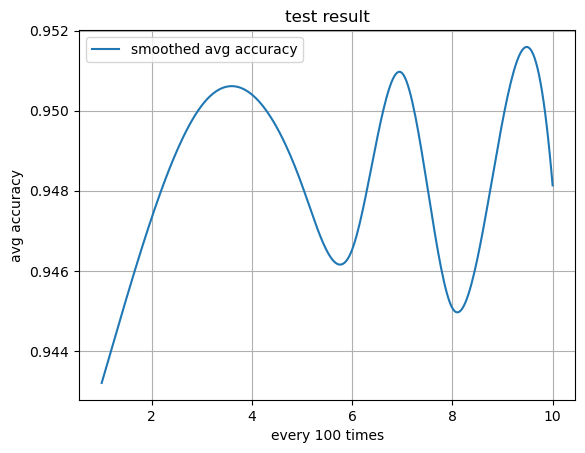

平均準確率: 0.947960000000005


In [19]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt

# ... existing code for function definitions ...
def compute_prototypes(trained_model, support_set, n_way, k_shot):
    prototypes = []
    for i in range(n_way):
        support_samples = support_set[i * k_shot:(i + 1) * k_shot]
        features = trained_model(support_samples)  # 提取支持樣本的特徵
        class_prototype = tf.reduce_mean(features, axis=0)  # 計算特徵均值
        prototypes.append(class_prototype)
    return tf.stack(prototypes)

# 余弦相似度計算
def cosine_similarity(a, b):
    a = tf.nn.l2_normalize(a, axis=-1)
    b = tf.nn.l2_normalize(b, axis=-1)
    return tf.reduce_sum(a * b, axis=-1)

# 對查詢樣本進行分類
def classify_query_samples(trained_model, query_set, prototypes):
    query_features = trained_model(query_set)  # 提取查詢樣本的特徵
    similarities = [cosine_similarity(query_features, proto) for proto in prototypes]
    similarities = tf.stack(similarities, axis=-1)
    predicted_labels = tf.argmax(similarities, axis=-1)  # 根據相似度最大選擇類別
    return predicted_labels

# 模型參數
n_way = 5  # 20個類別
k_shot = 5  # 每個類別5個支持樣本
numbers = list(range(964, 1623))  # 類別編號

# 預先生成1000組固定的測試樣本
random.seed(42)  # 設定隨機種子以確保可重複性
fixed_samples = []
for _ in range(1000):
    label_subset = random.choices(numbers, k=n_way)
    fixed_samples.append(label_subset)

def run_evaluation():
    acc = []  # 紀錄每次準確率
    avg_acc_per_100 = []  # 每100次的平均準確率
    
    # 開始計算
    for clk in range(1000):
        text = 0
        label_subset = fixed_samples[clk]  # 使用預先生成的樣本
        support_set = []
        query_set = []

        # 構造支持集和查詢集
        for class_idx in label_subset:
            support_set.extend(x_omni_test[(class_idx - 964) * 20:(class_idx - 964) * 20 + k_shot])
            text += 1

        text = 0
        for class_idx in label_subset:
            query_set.extend(x_omni_test[(class_idx - 964) * 20 + k_shot:(class_idx - 964) * 20 + 20])
            text += 3

        # 轉換為張量
        sup_tensor = tf.convert_to_tensor(support_set)
        que_tensor = tf.convert_to_tensor(query_set)
        
        # 計算類原型
        prototypes = compute_prototypes(train_model, sup_tensor, n_way, k_shot)

        # 對查詢樣本進行分類
        predicted_labels = classify_query_samples(train_model, que_tensor, prototypes)

        # 計算準確率
        count = 0
        t = 0
        k = 0
        for i in range(n_way):
            for j in range(20 - k_shot):
                if predicted_labels[t + j] == k:
                    count += 1
            t += 20 - k_shot
            k += 1

        acc.append((count / (n_way * (20 - k_shot))))

        # 每100次記錄平均值
        if (clk + 1) % 100 == 0:
            avg_acc = sum(acc[-100:]) / 100
            avg_acc_per_100.append(avg_acc)
            print(f"回合 {clk + 1}, 最近100次的平均準確率: {avg_acc}")

    return acc, avg_acc_per_100

# 執行評估
acc, avg_acc_per_100 = run_evaluation()

# 繪製圖表
from scipy.interpolate import make_interp_spline

# 原始 x 和 y 數據
x = np.arange(1, len(avg_acc_per_100) + 1)
y = np.array(avg_acc_per_100)

# 插值處理
x_new = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)
y_smooth = spl(x_new)

# 繪圖
plt.plot(x_new, y_smooth, label="smoothed avg accuracy")
plt.xlabel("every 100 times")
plt.ylabel("avg accuracy")
plt.title("test result")
plt.legend()
plt.grid()
plt.show()

avg_acc = sum(acc[:]) / 1000
print(f"平均準確率: {avg_acc}")

In [10]:
# # import random
# # import tensorflow as tf
# # import matplotlib.pyplot as plt

# # # ... existing code for function definitions ...
# def compute_prototypes(trained_model, support_set, n_way, k_shot):
#     prototypes = []
#     for i in range(n_way):
#         support_samples = support_set[i * k_shot:(i + 1) * k_shot]
#         features = trained_model(support_samples)  # 提取支持樣本的特徵
#         class_prototype = tf.reduce_mean(features, axis=0)  # 計算特徵均值
#         prototypes.append(class_prototype)
#     return tf.stack(prototypes)

# # 余弦相似度計算
# def cosine_similarity(a, b):
#     a = tf.nn.l2_normalize(a, axis=-1)
#     b = tf.nn.l2_normalize(b, axis=-1)
#     return tf.reduce_sum(a * b, axis=-1)

# # 對查詢樣本進行分類
# def classify_query_samples(trained_model, query_set, prototypes):
#     query_features = trained_model(query_set)  # 提取查詢樣本的特徵
#     similarities = [cosine_similarity(query_features, proto) for proto in prototypes]
#     similarities = tf.stack(similarities, axis=-1)
#     predicted_labels = tf.argmax(similarities, axis=-1)  # 根據相似度最大選擇類別
#     return predicted_labels

# # 模型參數
# n_way = 20  # 20個類別
# k_shot = 5  # 每個類別5個支持樣本
# numbers = list(range(964, 1623))  # 類別編號

# # 預先生成1000組固定的測試樣本
# random.seed(42)  # 設定隨機種子以確保可重複性
# fixed_samples = []
# for _ in range(1000):
#     label_subset = random.choices(numbers, k=n_way)
#     fixed_samples.append(label_subset)

# def run_evaluation():
#     acc = []  # 紀錄每次準確率
#     avg_acc_per_100 = []  # 每100次的平均準確率
    
#     # 開始計算
#     for clk in range(1000):
#         text = 0
#         label_subset = fixed_samples[clk]  # 使用預先生成的樣本
#         support_set = []
#         query_set = []

#         # 構造支持集和查詢集
#         for class_idx in label_subset:
#             support_set.extend(x_omni_test[(class_idx - 964) * 20:(class_idx - 964) * 20 + k_shot])
#             text += 1

#         text = 0
#         for class_idx in label_subset:
#             query_set.extend(x_omni_test[(class_idx - 964) * 20 + k_shot:(class_idx - 964) * 20 + 20])
#             text += 3

#         # 轉換為張量
#         sup_tensor = tf.convert_to_tensor(support_set)
#         que_tensor = tf.convert_to_tensor(query_set)
        
#         # 計算類原型
#         prototypes = compute_prototypes(train_model, sup_tensor, n_way, k_shot)

#         # 對查詢樣本進行分類
#         predicted_labels = classify_query_samples(train_model, que_tensor, prototypes)

#         # 計算準確率
#         count = 0
#         t = 0
#         k = 0
#         for i in range(n_way):
#             for j in range(20 - k_shot):
#                 if predicted_labels[t + j] == k:
#                     count += 1
#             t += 20 - k_shot
#             k += 1

#         acc.append((count / (n_way * (20 - k_shot))))

#         # 每100次記錄平均值
#         if (clk + 1) % 100 == 0:
#             avg_acc = sum(acc[-100:]) / 100
#             avg_acc_per_100.append(avg_acc)
#             print(f"回合 {clk + 1}, 最近100次的平均準確率: {avg_acc}")

#     return acc, avg_acc_per_100

# # 執行評估
# acc, avg_acc_per_100 = run_evaluation()

# # 繪製圖表
# from scipy.interpolate import make_interp_spline

# # 原始 x 和 y 數據
# x = np.arange(1, len(avg_acc_per_100) + 1)
# y = np.array(avg_acc_per_100)

# # 插值處理
# x_new = np.linspace(x.min(), x.max(), 300)
# spl = make_interp_spline(x, y, k=3)
# y_smooth = spl(x_new)

# # 繪圖
# plt.plot(x_new, y_smooth, label="smoothed avg accuracy")
# plt.xlabel("every 100 times")
# plt.ylabel("avg accuracy")
# plt.title("test result")
# plt.legend()
# plt.grid()
# plt.show()

# avg_acc = sum(acc[:]) / 1000
# print(f"平均準確率: {avg_acc}")

DA test

Testing on SVHN dataset:


c:\Users\TKU\anaconda3\envs\UMTRA2\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


SVHN Test Accuracy: 19.94% (tested on 26032 images)

Testing on MNIST dataset:
MNIST Test Accuracy: 99.36% (tested on 10000 images)

Total number of test images: 36032
- SVHN test images: 26032
- MNIST test images: 10000


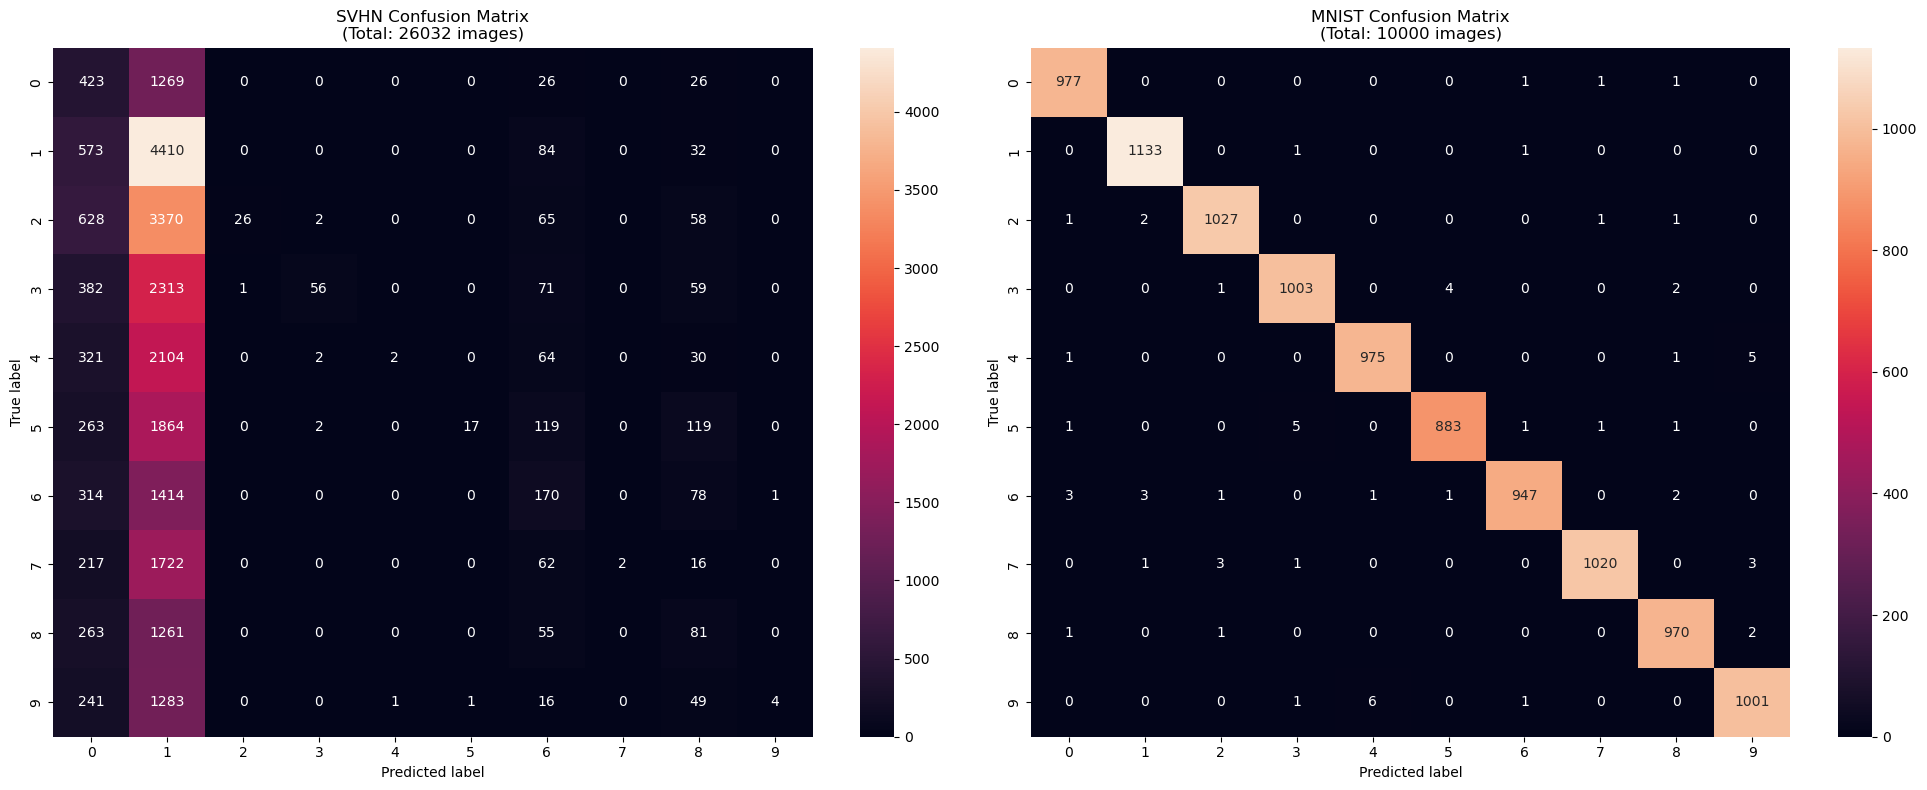

In [11]:
def test_on_datasets():
    # 初始化預測和真實標籤的列表
    y_pred_svhn_all = []
    y_true_svhn_all = []
    y_pred_mnist_all = []  
    y_true_mnist_all = []
    
    svhn_count = 0
    mnist_count = 0

    # 測試 SVHN
    print("Testing on SVHN dataset:")
    for x_batch, y_batch in svhn_test:
        predictions = model.predict(x_batch)
        y_pred = np.argmax(predictions, axis=1)
        y_pred_svhn_all.extend(y_pred)
        y_true_svhn_all.extend(y_batch)
        svhn_count += len(y_batch)
    
    accuracy_svhn = np.mean(np.array(y_pred_svhn_all) == np.array(y_true_svhn_all))
    print(f"SVHN Test Accuracy: {accuracy_svhn * 100:.2f}% (tested on {svhn_count} images)")
    
    # 測試 MNIST
    print("\nTesting on MNIST dataset:")
    for x_batch, y_batch in mnist_test:
        predictions = model.predict(x_batch)
        y_pred = np.argmax(predictions, axis=1)
        y_pred_mnist_all.extend(y_pred)
        y_true_mnist_all.extend(y_batch)
        mnist_count += len(y_batch)
    
    accuracy_mnist = np.mean(np.array(y_pred_mnist_all) == np.array(y_true_mnist_all))
    print(f"MNIST Test Accuracy: {accuracy_mnist * 100:.2f}% (tested on {mnist_count} images)")
    
    # 打印總測試張數
    total_images = svhn_count + mnist_count
    print(f"\nTotal number of test images: {total_images}")
    print(f"- SVHN test images: {svhn_count}")
    print(f"- MNIST test images: {mnist_count}")
    
    # 繪製混淆矩陣
    plt.figure(figsize=(20, 8))
    
    # SVHN 混淆矩陣
    plt.subplot(1, 2, 1)
    confusion_mtx_svhn = tf.math.confusion_matrix(y_true_svhn_all, y_pred_svhn_all)
    sns.heatmap(confusion_mtx_svhn, annot=True, fmt='d')
    plt.title(f'SVHN Confusion Matrix\n(Total: {svhn_count} images)')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    # MNIST 混淆矩陣
    plt.subplot(1, 2, 2)
    confusion_mtx_mnist = tf.math.confusion_matrix(y_true_mnist_all, y_pred_mnist_all)
    sns.heatmap(confusion_mtx_mnist, annot=True, fmt='d')
    plt.title(f'MNIST Confusion Matrix\n(Total: {mnist_count} images)')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    plt.tight_layout()
    plt.show()
test_on_datasets()

經過ada的處理

Updating BN statistics with SVHN data...
Testing on SVHN dataset:
SVHN Test Accuracy: 21.63% (tested on 26032 images)

Updating BN statistics with MNIST data...
Testing on MNIST dataset:
MNIST Test Accuracy: 98.57% (tested on 10000 images)

Total number of test images: 36032
- SVHN test images: 26032
- MNIST test images: 10000


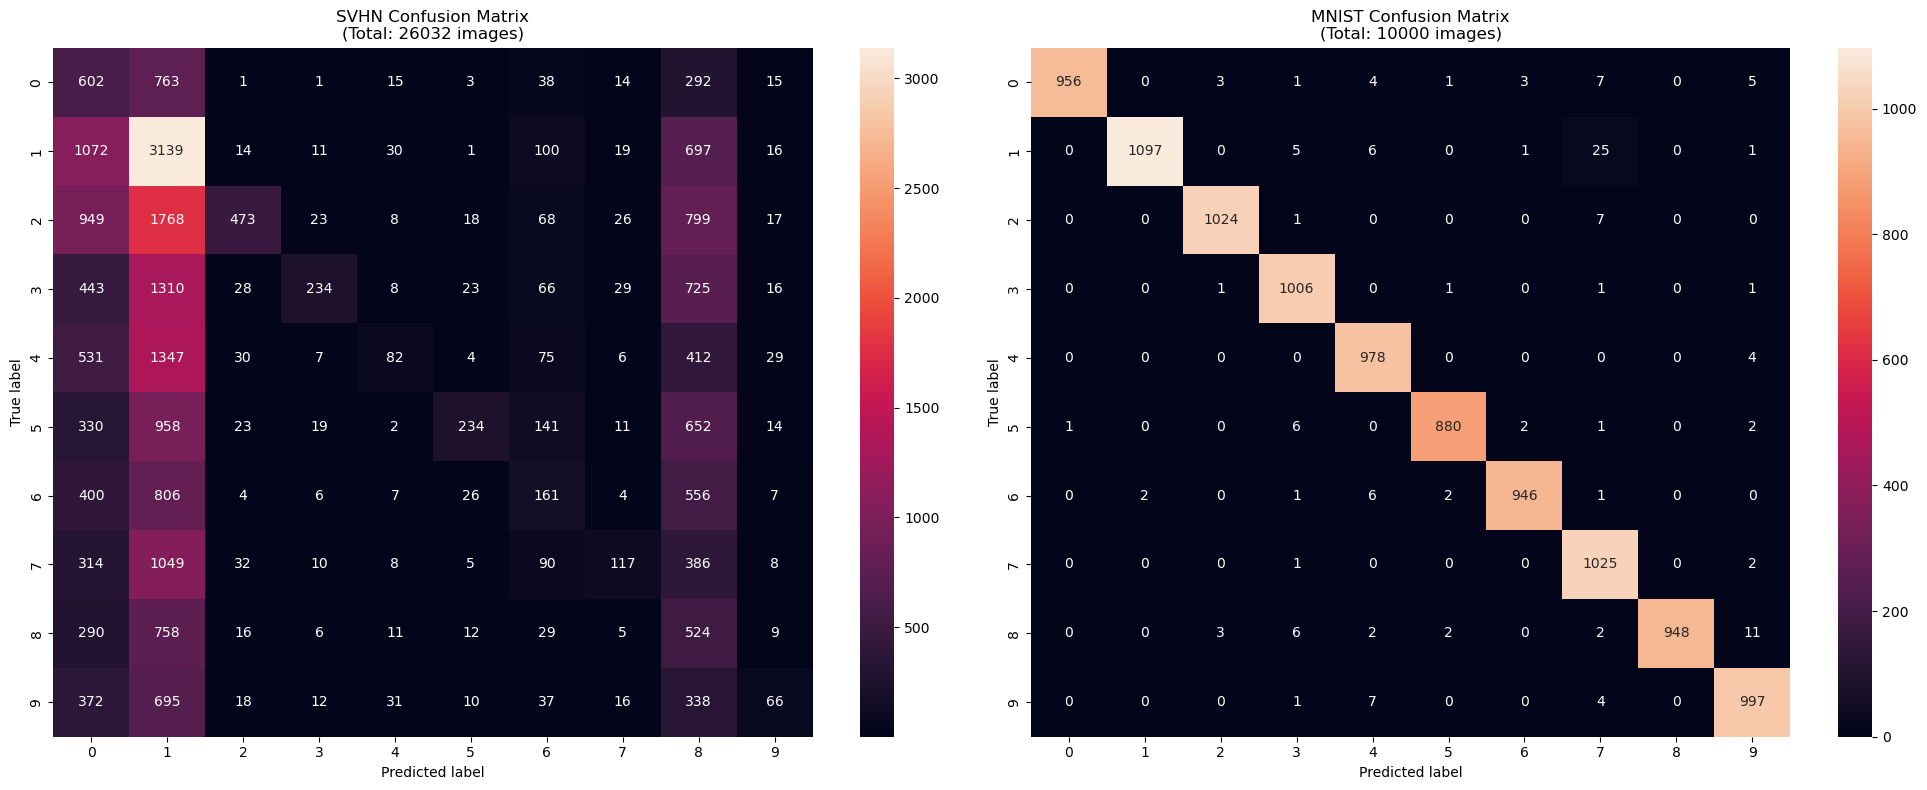

In [12]:
# 重置 BatchNormalization 層的統計數據
def reset_bn_stats(model):
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.BatchNormalization):
            layer.moving_mean.assign(tf.zeros_like(layer.moving_mean))
            layer.moving_variance.assign(tf.ones_like(layer.moving_variance))

def test_on_datasets():
    # 初始化預測和真實標籤的列表
    y_pred_svhn_all = []
    y_true_svhn_all = []
    y_pred_mnist_all = []  
    y_true_mnist_all = []
    
    svhn_count = 0
    mnist_count = 0

    # 在測試SVHN前，先重置BN層並用SVHN數據更新統計信息
    print("Updating BN statistics with SVHN data...")
            
    for images, labels in svhn_test:
        with tf.GradientTape() as tape:
            _ = model(images, training=True)

    # 測試 SVHN
    print("Testing on SVHN dataset:")
    for x_batch, y_batch in svhn_test:
        predictions = model.predict(x_batch)
        y_pred = np.argmax(predictions, axis=1)
        y_pred_svhn_all.extend(y_pred)
        y_true_svhn_all.extend(y_batch)
        svhn_count += len(y_batch)
    
    accuracy_svhn = np.mean(np.array(y_pred_svhn_all) == np.array(y_true_svhn_all))
    print(f"SVHN Test Accuracy: {accuracy_svhn * 100:.2f}% (tested on {svhn_count} images)")
    
    # 在測試MNIST前，先重置BN層並用MNIST數據更新統計信息
    print("\nUpdating BN statistics with MNIST data...")
    
            
    for images, labels in mnist_test:
        with tf.GradientTape() as tape:
            _ = model(images, training=True)

    # 測試 MNIST
    print("Testing on MNIST dataset:")
    for x_batch, y_batch in mnist_test:
        predictions = model.predict(x_batch)
        y_pred = np.argmax(predictions, axis=1)
        y_pred_mnist_all.extend(y_pred)
        y_true_mnist_all.extend(y_batch)
        mnist_count += len(y_batch)
    
    accuracy_mnist = np.mean(np.array(y_pred_mnist_all) == np.array(y_true_mnist_all))
    print(f"MNIST Test Accuracy: {accuracy_mnist * 100:.2f}% (tested on {mnist_count} images)")
    
    # 打印總測試張數
    total_images = svhn_count + mnist_count
    print(f"\nTotal number of test images: {total_images}")
    print(f"- SVHN test images: {svhn_count}")
    print(f"- MNIST test images: {mnist_count}")
    
    # 繪製混淆矩陣
    plt.figure(figsize=(20, 8))
    
    # SVHN 混淆矩陣
    plt.subplot(1, 2, 1)
    confusion_mtx_svhn = tf.math.confusion_matrix(y_true_svhn_all, y_pred_svhn_all)
    sns.heatmap(confusion_mtx_svhn, annot=True, fmt='d')
    plt.title(f'SVHN Confusion Matrix\n(Total: {svhn_count} images)')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    # MNIST 混淆矩陣
    plt.subplot(1, 2, 2)
    confusion_mtx_mnist = tf.math.confusion_matrix(y_true_mnist_all, y_pred_mnist_all)
    sns.heatmap(confusion_mtx_mnist, annot=True, fmt='d')
    plt.title(f'MNIST Confusion Matrix\n(Total: {mnist_count} images)')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    plt.tight_layout()
    plt.show()
    
test_on_datasets()

有initial gamma beta為 0

Resetting all BN layers...
Updating BN statistics with SVHN data...
Testing on SVHN dataset:
SVHN Test Accuracy: 19.78% (tested on 26032 images)

Resetting all BN layers...
Updating BN statistics with MNIST data...
Testing on MNIST dataset:
MNIST Test Accuracy: 11.80% (tested on 10000 images)

Total number of test images: 36032
- SVHN test images: 26032
- MNIST test images: 10000


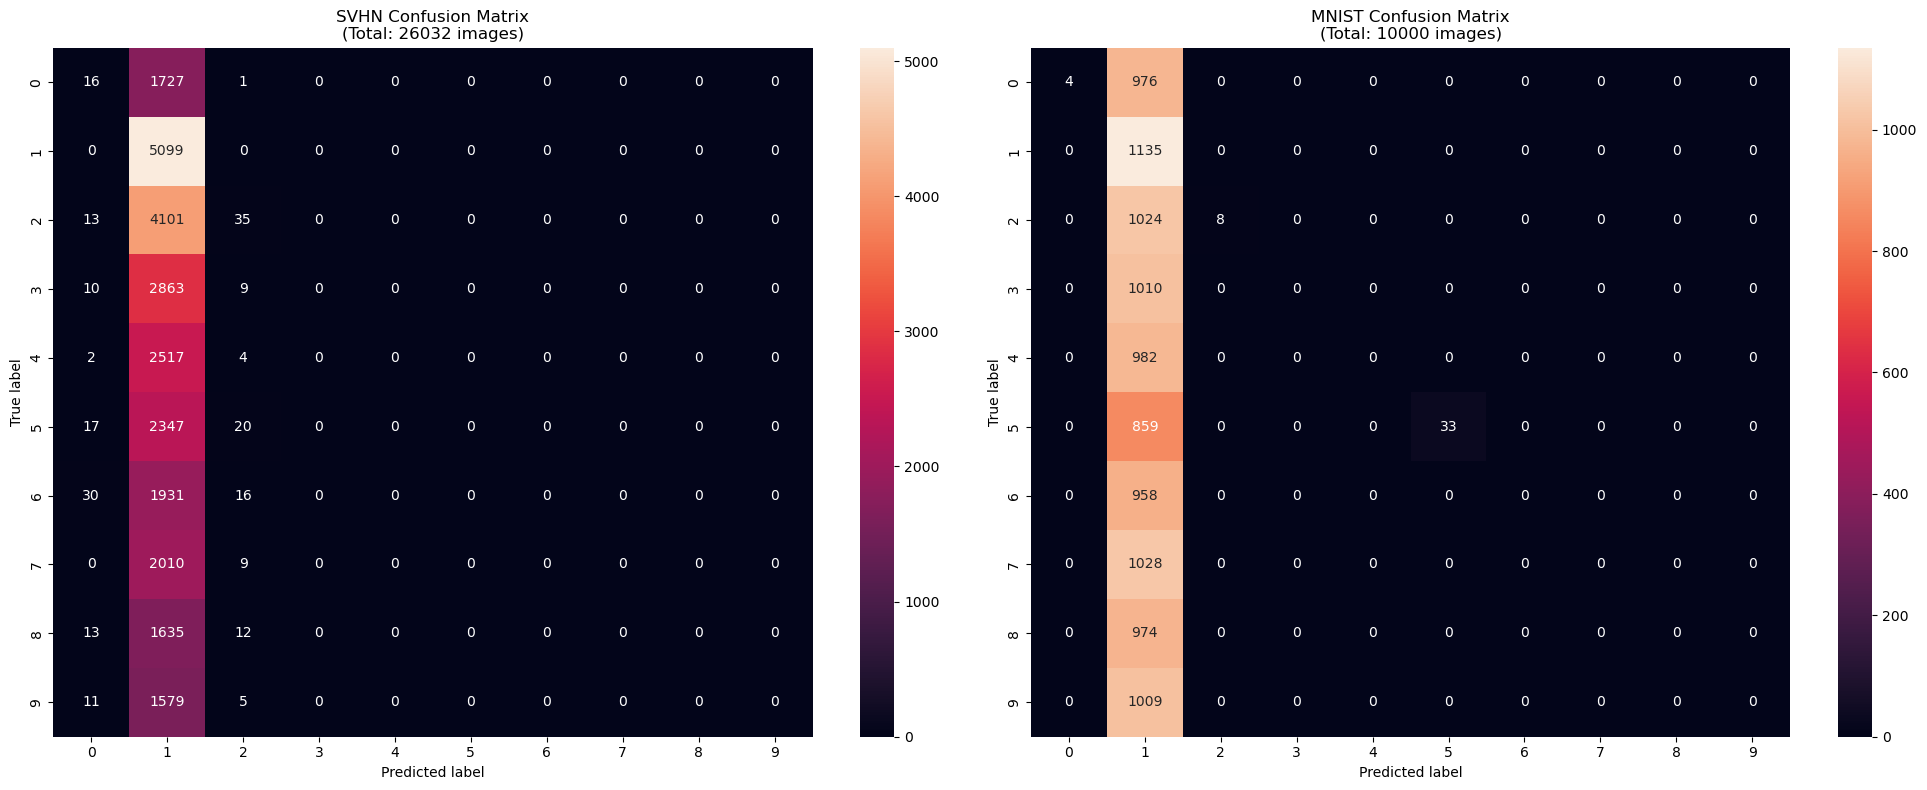

In [13]:
def test_on_datasets():
    # 初始化預測和真實標籤的列表
    y_pred_svhn_all = []
    y_true_svhn_all = []
    y_pred_mnist_all = []  
    y_true_mnist_all = []
    
    svhn_count = 0
    mnist_count = 0

    # 在開始測試前，先重置所有BN層的統計數據
    print("Resetting all BN layers...")
    reset_bn_stats(model)

    # 在測試SVHN前，先用SVHN數據更新BN統計信息
    print("Updating BN statistics with SVHN data...")
    for images, labels in svhn_test:
        with tf.GradientTape() as tape:
            _ = tf.stop_gradient(model(images, training=True))

    # 測試 SVHN
    print("Testing on SVHN dataset:")
    for x_batch, y_batch in svhn_test:
        predictions = model.predict(x_batch)
        y_pred = np.argmax(predictions, axis=1)
        y_pred_svhn_all.extend(y_pred)
        y_true_svhn_all.extend(y_batch)
        svhn_count += len(y_batch)
    
    accuracy_svhn = np.mean(np.array(y_pred_svhn_all) == np.array(y_true_svhn_all))
    print(f"SVHN Test Accuracy: {accuracy_svhn * 100:.2f}% (tested on {svhn_count} images)")
    
    # 在測試MNIST前，再次重置所有BN層的統計數據
    print("\nResetting all BN layers...")
    reset_bn_stats(model)

    # 用MNIST數據更新BN統計信息
    print("Updating BN statistics with MNIST data...")
    for images, labels in mnist_test:
        with tf.GradientTape() as tape:
            _ = tf.stop_gradient(model(images, training=True))

    # 測試 MNIST
    print("Testing on MNIST dataset:")
    for x_batch, y_batch in mnist_test:
        predictions = model.predict(x_batch)
        y_pred = np.argmax(predictions, axis=1)
        y_pred_mnist_all.extend(y_pred)
        y_true_mnist_all.extend(y_batch)
        mnist_count += len(y_batch)
    
    accuracy_mnist = np.mean(np.array(y_pred_mnist_all) == np.array(y_true_mnist_all))
    print(f"MNIST Test Accuracy: {accuracy_mnist * 100:.2f}% (tested on {mnist_count} images)")
    
    # 打印總測試張數
    total_images = svhn_count + mnist_count
    print(f"\nTotal number of test images: {total_images}")
    print(f"- SVHN test images: {svhn_count}")
    print(f"- MNIST test images: {mnist_count}")
    
    # 繪製混淆矩陣
    plt.figure(figsize=(20, 8))
    
    # SVHN 混淆矩陣
    plt.subplot(1, 2, 1)
    confusion_mtx_svhn = tf.math.confusion_matrix(y_true_svhn_all, y_pred_svhn_all)
    sns.heatmap(confusion_mtx_svhn, annot=True, fmt='d')
    plt.title(f'SVHN Confusion Matrix\n(Total: {svhn_count} images)')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    # MNIST 混淆矩陣
    plt.subplot(1, 2, 2)
    confusion_mtx_mnist = tf.math.confusion_matrix(y_true_mnist_all, y_pred_mnist_all)
    sns.heatmap(confusion_mtx_mnist, annot=True, fmt='d')
    plt.title(f'MNIST Confusion Matrix\n(Total: {mnist_count} images)')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    plt.tight_layout()
    plt.show()
test_on_datasets()    